# How to download TROPOMI L3 data

## 1. Import the library

In [1]:
import sys
tool_directory = '/home/avilanov/Desktop/Personal/Others/ebytes/'
sys.path.append(tool_directory)
import ebytes as eb

## 2. Define product characteristics

In [2]:
mission = 'sentinel-5p'
path = tool_directory + 'data/'
processing_lev = 'L3'
parameter = 'NO2'
input_type = None
start_date = '2021-11-18'
end_date = '2021-11-18'
lon_min = 0
lon_max = 4
lat_min = 40
lat_max = 43

## 3. Download data

In [3]:
TROPOMI_L3_eb_obj = eb.download_dataset(mission, path, processing_lev, parameter, input_type, 
                                        start_date, end_date, lon_min, lon_max, lat_min, lat_max)

/home/avilanov/Desktop/Personal/Others/ebytes/data//sentinel-5p/L3/NO2/2021-11/TROPOMI_L3_NO2_COLUMN_202111.asc.gz
TROPOMI_L3_NO2_COLUMN_202111.asc.gz was downloaded.


## 4. Read data

In [4]:
file = 'TROPOMI_L3_NO2_COLUMN_202111.asc.gz'
date = '2021-11'

In [5]:
data = TROPOMI_L3_eb_obj.read(file, date)
data

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 1440, longitude: 2880)
Coordinates:
  * time       (time) datetime64[ns] 2021-11-01
  * latitude   (latitude) float64 -89.94 -89.81 -89.69 ... 89.69 89.81 89.94
  * longitude  (longitude) float64 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
Data variables:
    NO2        (time, latitude, longitude) float64 nan nan nan ... nan nan nan

In [6]:
data_array = data.NO2.isel(time=0)
data_array

<xarray.DataArray 'NO2' (latitude: 1440, longitude: 2880)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time       datetime64[ns] 2021-11-01
  * latitude   (latitude) float64 -89.94 -89.81 -89.69 ... 89.69 89.81 89.94
  * longitude  (longitude) float64 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9

In [7]:
latitude_array = data.latitude
latitude_array

<xarray.DataArray 'latitude' (latitude: 1440)>
array([-89.9375, -89.8125, -89.6875, ...,  89.6875,  89.8125,  89.9375])
Coordinates:
  * latitude  (latitude) float64 -89.94 -89.81 -89.69 ... 89.69 89.81 89.94

In [8]:
longitude_array = data.longitude
longitude_array

<xarray.DataArray 'longitude' (longitude: 2880)>
array([-179.9375, -179.8125, -179.6875, ...,  179.6875,  179.8125,  179.9375])
Coordinates:
  * longitude  (longitude) float64 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9

## 5. Visualize data

In [9]:
fig_title = 'Nitrogen dioxide over Europe during November 2011'
units = 'molec cm-2'

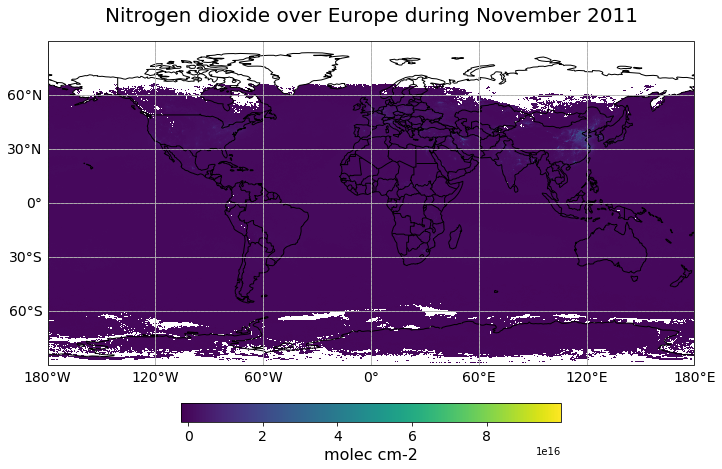

In [11]:
TROPOMI_L3_eb_obj.visualize(data_array, 
                            latitude_array, 
                            longitude_array, 
                            units, fig_title, 
                            fig_size=(15, 7), 
                            set_global=True)